#Self Organizing Map

##Install MiniSom Package

In [1]:
#!pip install MiniSom

### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

## Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x=10,y=10, input_len = 15, sigma = 1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X,num_iteration=100)

##Visualizing the results


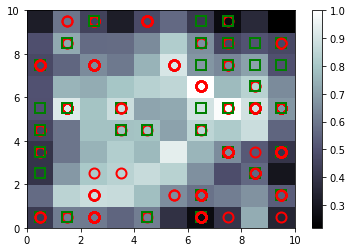

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone() #initialize the window
#the winning nodes, the mid distances, the high mid is in white color and are frauds
pcolor(som.distance_map().T)
colorbar()
#red circles customers not approved, green square approved
markers = ['o', 's']
colors = ['r', 'g']
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5,
        w[1]+0.5,
        markers[y[i]], markeredgecolor =colors[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
#show()

## Finding the frauds


In [8]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,5)], mappings[(7,5)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [9]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15767264
15704581
15761854
15725776
15815040
15697460
15788442
15737998
15586183
15718921
15633944
15607988
15801072
15683993
15797767
15744044
15632010
15627365
15573798
15700300
15647295
15791944
15576680
15620570
15592412
15580914
15785339
15678210
15664615
15607986
15585928
15716276
15583067
15578722
15623072
15748499
15569682
15803682
15770406
15592773
15762392
15591107
15588854
15699294
